<a href="https://colab.research.google.com/github/Kango911/1_Lab_Algo2/blob/main/1_Lab_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▎Шаг 1: Импорт необходимых библиотек

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt

# ▎Шаг 2: Функция для замера времени выполнения алгоритма

In [15]:
def time_execution(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# ▎Шаг 3: Реализация алгоритмов

In [16]:
# Готовая реализация сортировки
def built_in_sort(arr):
    return sorted(arr)

# Собственная реализация сортировки (например, пузырьковая сортировка)
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Готовая реализация поиска
def built_in_search(arr, target):
    return target in arr

# Собственная реализация поиска
def linear_search(arr, target):
    for element in arr:
        if element == target:
            return True
    return False

# ▎Шаг 4: Генерация данных и замер времени для анализа сложности

In [17]:
# Функция для генерации случайных данных
def generate_data(n):
    return np.random.randint(0, 10000, size=n)

# Список для хранения результатов
results_sort = []
results_search = []

# Запуск алгоритмов с различными N
N_values = [1, 2, 5, 7, 10, 15, 20, 30, 50, 70, 100, 150]

for N in N_values:
    data = generate_data(N)

    # Замер времени для сортировки
    sort_time = time_execution(built_in_sort, data.copy())
    results_sort.append((N, sort_time))

    # Замер времени для поиска
    target = np.random.randint(0, 10000)  # Случайный элемент для поиска
    search_time = time_execution(built_in_search, data.copy(), target)
    results_search.append((N, search_time))

# ▎Шаг 5: Построение графиков

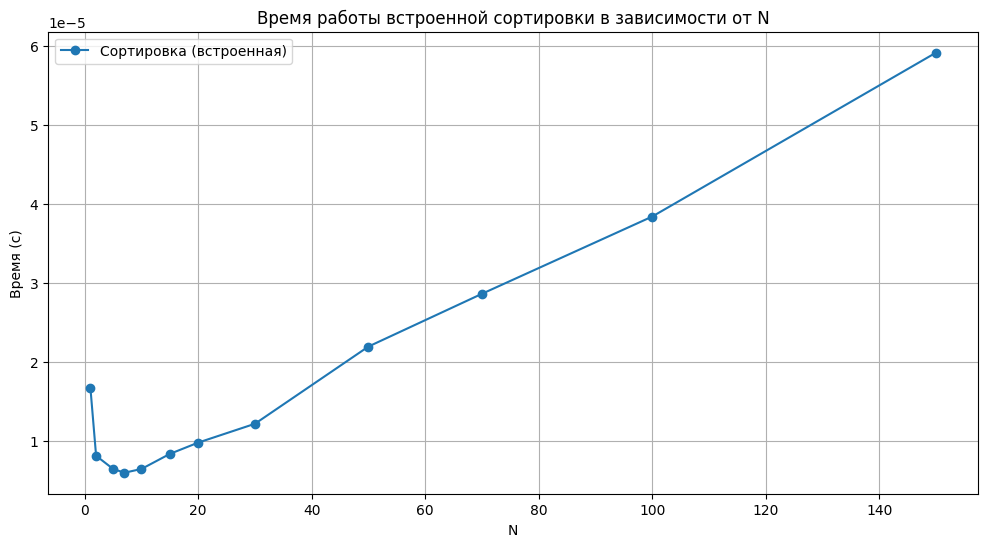

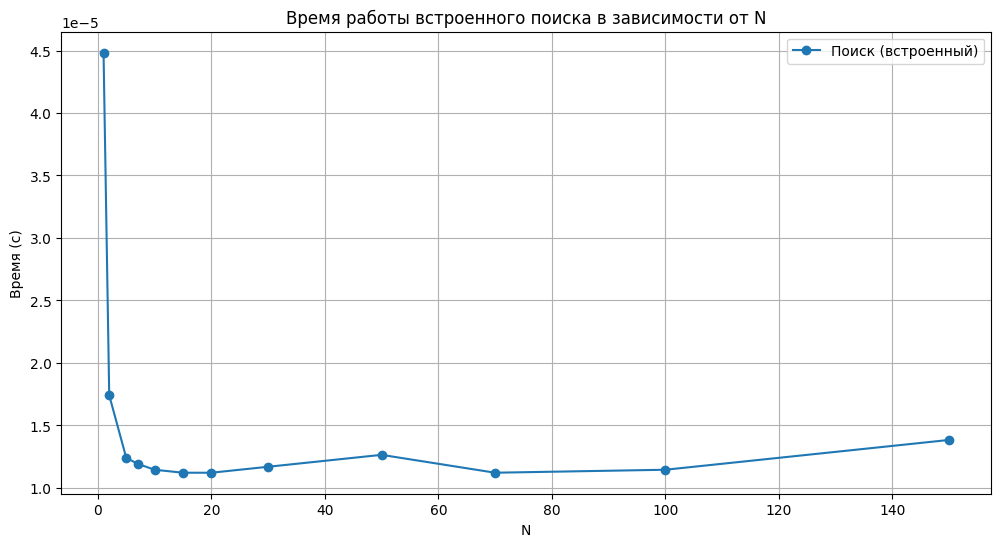

In [18]:
# График для сортировки
N_sort, time_sort = zip(*results_sort)
plt.figure(figsize=(12, 6))
plt.plot(N_sort, time_sort, marker='o', label='Сортировка (встроенная)')
plt.title('Время работы встроенной сортировки в зависимости от N')
plt.xlabel('N')
plt.ylabel('Время (с)')
plt.legend()
plt.grid()
plt.show()

# График для поиска
N_search, time_search = zip(*results_search)
plt.figure(figsize=(12, 6))
plt.plot(N_search, time_search, marker='o', label='Поиск (встроенный)')
plt.title('Время работы встроенного поиска в зависимости от N')
plt.xlabel('N')
plt.ylabel('Время (с)')
plt.legend()
plt.grid()
plt.show()

# ▎Шаг 6: Сравнение различных случаев

In [19]:
# Определяем наборы данных
def best_case(n):
    return np.array([i for i in range(n)])  # Упорядоченный массив

def average_case(n):
    return generate_data(n)  # Случайный массив

def worst_case(n):
    return np.array([i for i in range(n-1, -1, -1)])  # Обратный массив

# Таблица для хранения результатов
table_results = {
    'Параметры': [],
    'Готовая реализация (Сортировка)': [],
    'Готовая реализация (Поиск)': [],
    'Собственная реализация (Сортировка)': [],
    'Собственная реализация (Поиск)': []
}

N_cases = [5, 50, 500]

for N in N_cases:
    for case in ['Лучший случай', 'Средний случай', 'Худший случай']:
        if case == 'Лучший случай':
            data = best_case(N)
        elif case == 'Средний случай':
            data = average_case(N)
        else:
            data = worst_case(N)

        # Замер времени для готовой реализации
        time_builtin_sort = time_execution(built_in_sort, data.copy())
        time_builtin_search = time_execution(built_in_search, data.copy(), data[0])  # Поиск первого элемента

        # Замер времени для собственной реализации
        time_own_sort = time_execution(bubble_sort, data.copy())
        time_own_search = time_execution(linear_search, data.copy(), data[0])  # Поиск первого элемента

        table_results['Параметры'].append(f'N={N}, {case}')
        table_results['Готовая реализация (Сортировка)'].append(time_builtin_sort)
        table_results['Готовая реализация (Поиск)'].append(time_builtin_search)
        table_results['Собственная реализация (Сортировка)'].append(time_own_sort)
        table_results['Собственная реализация (Поиск)'].append(time_own_search)

# Вывод таблицы результатов
import pandas as pd

df_results = pd.DataFrame(table_results)
print(df_results)

               Параметры  Готовая реализация (Сортировка)  \
0     N=5, Лучший случай                         0.000016   
1    N=5, Средний случай                         0.000006   
2     N=5, Худший случай                         0.000005   
3    N=50, Лучший случай                         0.000022   
4   N=50, Средний случай                         0.000024   
5    N=50, Худший случай                         0.000030   
6   N=500, Лучший случай                         0.000070   
7  N=500, Средний случай                         0.000179   
8   N=500, Худший случай                         0.000083   

   Готовая реализация (Поиск)  Собственная реализация (Сортировка)  \
0                    0.000052                             0.000011   
1                    0.000015                             0.000012   
2                    0.000010                             0.000013   
3                    0.000012                             0.000532   
4                    0.000023          